In [0]:
!pip3 install tensorflow-gpu==2.0.0-beta0

  Using cached https://files.pythonhosted.org/packages/e8/7e/87c4c94686cda7066f52cbca4c344248516490acdd6b258ec6b8a805d956/tensorflow_gpu-2.0.0b0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a4/96/571b875cd81dda9d5dfa1422a4f9d749e67c0a8d4f4f0b33a4e5f5f35e27/tb_nightly-1.14.0a20190603-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/32/dd/99c47dd007dcf10d63fd895611b063732646f23059c618a373e85019eb0e/tf_estimator_nightly-1.14.0.dev2019060501-py2.py3-none-any.whl
  Found existing installation: tensorflow-gpu 2.1.0
    Uninstalling tensorflow-gpu-2.1.0:
      Successfully uninstalled tensorflow-gpu-2.1.0


In [0]:
!pip install tensorflow-addons

  Using cached https://files.pythonhosted.org/packages/85/d4/c0cd1057b331bc38b65478302114194bd8e1b9c2bbc06e300935c0e93d90/tensorflow-2.1.0-cp36-cp36m-manylinux2010_x86_64.whl


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
import os
import glob
import numpy as np
import numpy.random as npr
import pandas as pd
import tensorflow.keras as k
import tensorflow.keras.layers as l
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import random
from keras import optimizers
import tensorboard 
import datetime


In [0]:

buffersize = 50
batchsize = 30
N_samples = 413
N_trainingsamples = 383
N_validationsamples = 30
# take, split, zip
# training
# build dataset of filenames
name_path = "/content/drive/My Drive/Masterlab/a. Training Set"
filenames = []
file_dir = os.listdir(name_path)

for filename in sorted(file_dir):
    filenames.append(filename)

print(sorted(filenames))
filename_ds = tf.data.Dataset.from_tensor_slices(sorted(filenames))
@tf.function
def flip1(img):
   img_flipped = tf.image.random_flip_up_down(img)
   img = tf.cast(img_flipped, tf.float32) / 255.0
   return img

def flip2(img):
   img_flipped = tf.image.random_flip_left_right(img)
   img = tf.cast(img_flipped, tf.float32) / 255.0
   return img

def color(img):
    img = tf.image.random_hue(img, 0.02)
  #  img = tf.image.random_saturation(img, 0.6, 1.6)
    img = tf.image.random_brightness(img, 0.02)
 #   img = tf.image.random_contrast(img, 0.7, 1.3)
    img = tf.cast(img, tf.float32) / 255.0
    return img
    
def rotate(img):
    angles = tf.random.uniform([], minval=0, maxval=359, dtype=tf.dtypes.float32)
    img = tfa.image.rotate(img, angles, interpolation='NEAREST', name=None)
    img = tf.cast(img, tf.float32) / 255.0
    return img
def zoom(img):
    scales = list(np.arange(0.8, 1.0, 0.01))
    boxes = np.zeros((len(scales), 2))

    for i, scale in enumerate(scales):
        x1 = 0.5 - (0.5 * scale)
        y1 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1]
    # Create different crops for an image
    img = tf.image.crop_and_resize(img, boxes=boxes, box_indices=np.zeros(len(scales)), crop_size=(256, 256))
    # Create different crops for an image
    crops = tf.image.crop_and_resize([img], boxes=boxes, box_indices=np.zeros(len(scales)),
                                             crop_size=(256, 256))
    # Return a random crop
    return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]
            

"""def zoom(img, label):
    scales = list(np.arange(0.8, 1.0, 0.01))
    boxes = np.zeros((len(scales), 2))

    for i, scale in enumerate(scales):
        x1 = 0.5 - (0.5 * scale)
        y1 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1]

    def random_crop(img,label):
        # Create different crops for an image
        img = tf.image.crop_and_resize([img], boxes=boxes, box_indices=np.zeros(len(scales)), crop_size=(256, 256))
        label = label
        # Return a random crop
        return img, label

    choice = random.random()

    # Only apply cropping 50% of the time
    return tf.cond(choice < 0.5, lambda: img, lambda: random_crop(img))"""

def rot90(img):
    img = tf.image.rot90(img, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    img = tf.cast(img, tf.float32) / 255.0
    return img

def random_jpg_quality(img):  
    
    a = random.randint(1,100)
    b = random.randint(1,100)
    if a<b:
      min = a
      max = b
    elif a == b:
      min = a-2
      max = a
    else:
      min = b
      max = a
    img = tf.image.random_jpeg_quality(
                          img,
                          min_jpeg_quality = min,
                          max_jpeg_quality = max,
                          seed=None)
    img = tf.cast(img, tf.float32) / 255.0
    return img

['IDRiD_001.jpg', 'IDRiD_002.jpg', 'IDRiD_003.jpg', 'IDRiD_004.jpg', 'IDRiD_005.jpg', 'IDRiD_006.jpg', 'IDRiD_007.jpg', 'IDRiD_008.jpg', 'IDRiD_009.jpg', 'IDRiD_010.jpg', 'IDRiD_011.jpg', 'IDRiD_012.jpg', 'IDRiD_013.jpg', 'IDRiD_014.jpg', 'IDRiD_015.jpg', 'IDRiD_016.jpg', 'IDRiD_017.jpg', 'IDRiD_018.jpg', 'IDRiD_019.jpg', 'IDRiD_020.jpg', 'IDRiD_021.jpg', 'IDRiD_022.jpg', 'IDRiD_023.jpg', 'IDRiD_024.jpg', 'IDRiD_025.jpg', 'IDRiD_026.jpg', 'IDRiD_027.jpg', 'IDRiD_028.jpg', 'IDRiD_029.jpg', 'IDRiD_030.jpg', 'IDRiD_031.jpg', 'IDRiD_032.jpg', 'IDRiD_033.jpg', 'IDRiD_034.jpg', 'IDRiD_035.jpg', 'IDRiD_036.jpg', 'IDRiD_037.jpg', 'IDRiD_038.jpg', 'IDRiD_039.jpg', 'IDRiD_040.jpg', 'IDRiD_041.jpg', 'IDRiD_042.jpg', 'IDRiD_043.jpg', 'IDRiD_044.jpg', 'IDRiD_045.jpg', 'IDRiD_046.jpg', 'IDRiD_047.jpg', 'IDRiD_048.jpg', 'IDRiD_049.jpg', 'IDRiD_050.jpg', 'IDRiD_051.jpg', 'IDRiD_052.jpg', 'IDRiD_053.jpg', 'IDRiD_054.jpg', 'IDRiD_055.jpg', 'IDRiD_056.jpg', 'IDRiD_057.jpg', 'IDRiD_058.jpg', 'IDRiD_059.jp

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


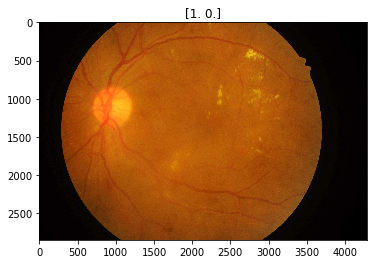

In [0]:

# build training and validation dataset of label
N_prefetch = 8 
N_parallel_iteration = 4
N_testsamples = 103
csv_path = "/content/drive/My Drive/Masterlab/a. IDRiD_Disease Grading_Training Labels.csv"
files_csv = pd.read_csv(csv_path, usecols=[1])


labels = np.zeros(shape=(N_samples, 2))

csv_tensor = tf.convert_to_tensor(files_csv.values, dtype=tf.int32)
csv_tensor = tf.map_fn(lambda x: 1 if x > 1 else 0, files_csv.values)
for i in range(N_samples):
    if csv_tensor[i] == 1:
         labels[i][0] = 1
    else:
         labels[i][1] = 1

#labels_train = t[0:N_trainingsamples]
#labels_train = tf.convert_to_tensor(labels_train, dtype=tf.int64)
#labels_train_ds = tf.data.Dataset.from_tensor_slices(labels_train)

#labels_val = t[N_trainingsamples:N_samples]
#labels_val = tf.convert_to_tensor(labels_val, dtype=tf.int64)
#labels_val_ds = tf.data.Dataset.from_tensor_slices(labels_val)


# build dataset of images
def load_file_names():
    files = glob.glob("/content/drive/My Drive/Masterlab/a. Training Set/*.jpg")
    return files


img_list = []
files = sorted(load_file_names())

def parse_train_function(files,labels):
    image_string = tf.io.read_file(files)
    image_decoded = tf.io.decode_jpeg(image_string)
    image_resized = tf.image.resize_with_pad(image_decoded,
                                             256,
                                             256)
 
    a = random.randint(1,10)
    if a == 1:
      img = zoom(image_resized)
      img = tf.cast(img, tf.float32) / 255.0  
    elif a== 2:
      img = rotate(image_resized)
    elif a== 3:
      img = rot90(image_resized)
    elif a== 4:
      img = zoom(image_resized)    
    elif a== 5:
      img = flip1(image_resized)
    elif a== 6:
      img = flip2(image_resized)    
    else:
      img = image_resized  
      img = tf.cast(img, tf.float32) / 255.0       
    label = labels
    return img, label

def parse_val_function(files,labels):
    image_string = tf.io.read_file(files)
    image_decoded = tf.io.decode_jpeg(image_string)
    image_resized = tf.image.resize_with_pad(image_decoded,
                                             256,
                                             256)
    img = tf.cast(image_resized, tf.float32) / 255.0
    label = labels
    return img, label

def build_train_ds(files, labels, batchsize):
    ds = tf.data.Dataset.from_tensor_slices((files, labels))
    ds = ds.map(parse_train_function, N_parallel_iteration)
    ds = ds.shuffle(380).batch(batchsize).repeat(-1).prefetch(N_prefetch)
    return ds

def build_val_ds(files, labels, batchsize):
    ds = tf.data.Dataset.from_tensor_slices((files, labels))
    ds = ds.map(parse_val_function, N_parallel_iteration)
    ds = ds.shuffle(20).batch(30).prefetch(N_prefetch)
    return ds

"""for i in range(413):
  print(files[i])
  print(t[i])"""
# build total training dataset
shuffle_idx = np.arange(0, N_samples)
np.random.shuffle(shuffle_idx)
files = [files[i] for i in shuffle_idx]
labels = [labels[i] for i in shuffle_idx]

train_ds = build_train_ds(files[0:N_trainingsamples], labels[0:N_trainingsamples], batchsize)
val_ds = build_val_ds(files[N_trainingsamples:N_samples], labels[N_trainingsamples:N_samples], batchsize)

img = plt.imread(files[100])
plt.imshow(img)
plt.title(labels[100])
plt.show()


In [0]:
# data argumentation


#augmentations = [flip1_func, flip2_func, color, rot_func]

"""def build_dataset(image,label):
  a_ds = tf.data.Dataset.from_tensor_slices((image,label))
  a_ds = a_ds.shuffle(buffersize)
  c = random.random()
  if c < 0.25:
    a_ds = a_ds.map(flip1_func, num_parallel_calls=4)
    a_ds = a_ds.map(flip2_func, num_parallel_calls=4).batch(batchsize).repeat(-1).prefetch(N_prefetch)
  elif c< 0.5 and c>0.25:
    a_ds = a_ds.map(rot_func, num_parallel_calls=4).batch(batchsize).repeat(-1).prefetch(N_prefetch)
  elif c > 0.5 and c < 0.75:
    a_ds = a_ds.map(color, num_parallel_calls=4).batch(batchsize).repeat(-1).prefetch(N_prefetch)
  else:
    a_ds = a_ds.map(zoom, num_parallel_calls=4).batch(batchsize).repeat(-1).prefetch(N_prefetch)
  return img,label

pred = tf.constant(False, dtype=tf.bool)
shuffle_idx = np.arange(N_trainingsamples)
np.random.shuffle(shuffle_idx)
img= [img_train_tensor[i] for i in shuffle_idx]
label = [labels_train[i] for i in shuffle_idx]
a_ds = build_dataset(img[0:N_trainingsamples],label[0:N_trainingsamples])

# Add the augmentations to the dataset
for f in augmentations:
    # Apply the augmentation, run 4 jobs in parallel.
    dataset = train_ds.map(f, num_parallel_calls=4)
# Make sure that the values are still in [0, 1]
dataset = dataset_ds.map(lambda x: tf.clip_by_value(x, 0, 1), num_parallel_calls=4)
plot_images(dataset, n_images=10, samples_per_image=15)


for f in augmentations:
    # Apply an augmentation only in 25% of the cases.
    dataset = train_ds.map(lambda x: tf.cond(random.random() > 0.75, lambda: f(x), lambda: x), num_parallel_calls=4)"""

'def build_dataset(image,label):\n  a_ds = tf.data.Dataset.from_tensor_slices((image,label))\n  a_ds = a_ds.shuffle(buffersize)\n  c = random.random()\n  if c < 0.25:\n    a_ds = a_ds.map(flip1_func, num_parallel_calls=4)\n    a_ds = a_ds.map(flip2_func, num_parallel_calls=4).batch(batchsize).repeat(-1).prefetch(N_prefetch)\n  elif c< 0.5 and c>0.25:\n    a_ds = a_ds.map(rot_func, num_parallel_calls=4).batch(batchsize).repeat(-1).prefetch(N_prefetch)\n  elif c > 0.5 and c < 0.75:\n    a_ds = a_ds.map(color, num_parallel_calls=4).batch(batchsize).repeat(-1).prefetch(N_prefetch)\n  else:\n    a_ds = a_ds.map(zoom, num_parallel_calls=4).batch(batchsize).repeat(-1).prefetch(N_prefetch)\n  return img,label\n\npred = tf.constant(False, dtype=tf.bool)\nshuffle_idx = np.arange(N_trainingsamples)\nnp.random.shuffle(shuffle_idx)\nimg= [img_train_tensor[i] for i in shuffle_idx]\nlabel = [labels_train[i] for i in shuffle_idx]\na_ds = build_dataset(img[0:N_trainingsamples],label[0:N_trainingsamples

In [0]:

N_testsamples = 103
# build testing dataset of images
def load_testfile_names():
    files = glob.glob("/content/drive/My Drive/Masterlab/b. Testing Set/*.jpg")
    return files


img_list_test = []
test_files = load_testfile_names()

for file in sorted(test_files):
    image_string = tf.io.read_file(file)
    image_decoded = tf.io.decode_image(image_string)
   # image_resize = tf.image.resize(image_decoded, [256, 170])  # 修改图像尺寸，原图4288*2848
    image_resized = tf.image.resize_with_pad(image_decoded,
                                             256,
                                             256)
    img = tf.cast(image_resized, tf.float32) / 255.0
    img_list_test.append(img)
    
img_tensor_test = tf.convert_to_tensor(img_list_test, dtype=tf.float32)

img_test_ds = tf.data.Dataset.from_tensor_slices(img_tensor_test)

# build testing dataset of labels

csv_path_test = "/content/drive/My Drive/Masterlab/b. IDRiD_Disease Grading_Testing Labels.csv"
files_csv_test = pd.read_csv(csv_path_test, usecols=[1])


# csv_tensor = tf.reshape(csv_tensor, [-1])

t = np.zeros(shape=(103, 2))
csv_tensor = tf.convert_to_tensor(files_csv_test.values, dtype=tf.float32)
csv_tensor = tf.map_fn(lambda x: 1 if x > 1 else 0, csv_tensor)
for i in range(N_testsamples):
    if csv_tensor[i] == 1:
         t[i][0] = 1
    else:
         t[i][1] = 1

labels_ds_test = tf.data.Dataset.from_tensor_slices(t)
test_ds = tf.data.Dataset.zip((img_test_ds, labels_ds_test)).batch(batchsize)


In [0]:

from keras import regularizers

class MyModel(k.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv0 = k.layers.Conv2D(16, 3,
                                     activation='relu', input_shape=(batchsize, 256, 256, 3),padding="same")
        self.pool0 = k.layers.MaxPooling2D(pool_size=(3, 3))
        self.conv1 = k.layers.Conv2D(64, 3, 
                                     activation='relu',padding="same")

        self.pool1 = k.layers.MaxPooling2D(pool_size=(3, 3))
        self.drop0 = k.layers.Dropout(0.3)

        self.conv2 = k.layers.Conv2D(64, 3,
                                     activation='relu',padding="same")
        self.pool2 = k.layers.MaxPooling2D(pool_size=(3, 3))

        self.conv3 = k.layers.Conv2D(128, 3,
                                     activation='relu',padding='same')
      
     #   self.bn3 = k.layers.BatchNormalization()
        self.pool3 = k.layers.MaxPooling2D(pool_size=(3, 3))
        self.drop1 = k.layers.Dropout(0.3)
        self.conv4 = k.layers.Conv2D(128, 3,
                                     activation='relu',padding='same')
        self.pool4 = k.layers.MaxPooling2D(pool_size=(3, 3))
        self.drop2 = k.layers.Dropout(0.3)

        self.flatten0 = k.layers.Flatten()
        self.dense0 = k.layers.Dense(512,
                                     activation="relu")
        self.drop2 = k.layers.Dropout(0.4)
        self.dense1 = k.layers.Dense(128, activation="relu")
        self.drop3 = k.layers.Dropout(0.5)
        self.dense2 = k.layers.Dense(2, activation="softmax")

    def call(self, inputs, training=False):
        output = self.conv0(inputs)
        output = self.pool0(output)
        output = self.conv1(output)
        output = self.pool1(output)
        output = self.drop0(output)
        output = self.conv2(output)
        output = self.pool2(output)
       
        output = self.conv3(output)
        output = self.pool3(output)
        output = self.drop1(output)
        output = self.conv4(output)
        output = self.pool4(output)
        output = self.drop2(output)

        output = self.flatten0(output)
        output = self.dense0(output)
        output = self.drop2(output)
        output = self.dense1(output)
        output = self.drop3(output)
        output = self.dense2(output)
        return output
model = MyModel()
#opt = k.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(optimizer= 'adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

model.build((batchsize, 256, 256, 3))
model.summary()


Model: "my_model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           multiple                  448       
_________________________________________________________________
max_pooling2d_85 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_86 (Conv2D)           multiple                  9280      
_________________________________________________________________
max_pooling2d_86 (MaxPooling multiple                  0         
_________________________________________________________________
dropout_80 (Dropout)         multiple                  0         
_________________________________________________________________
conv2d_87 (Conv2D)           multiple                  36928     
_________________________________________________________________
max_pooling2d_87 (MaxPooling multiple                  

'class MyModel(k.Model):\n    def __init__(self):\n        super(MyModel, self).__init__()\n        self.conv0 = k.layers.Conv2D(32, 3, activation="relu", padding="same")\n        self.conv1 = k.layers.BatchNormalization()\n        self.conv2 = k.layers.Conv2D(32, 3, activation=\'relu\', padding=\'same\')\n        self.bn0 = k.layers.BatchNormalization()\n        self.pool0 = k.layers.MaxPooling2D(pool_size=(2, 2))\n\n        \n        self.conv3 = k.layers.Conv2D(128, 3, activation=\'relu\', padding=\'same\')\n        self.conv4 = k.layers.BatchNormalization()\n        self.conv5= k.layers.Conv2D(128, 3, activation=\'relu\', padding=\'same\')\n        self.bn1 = k.layers.BatchNormalization()\n        self.pool1 = k.layers.MaxPooling2D(pool_size=(2, 2))\n\n        self.conv6 = k.layers.Conv2D(256, 3, activation=\'relu\', padding=\'same\')\n        self.conv7 = k.layers.BatchNormalization()\n        self.conv8 = k.layers.Conv2D(256, 3, activation=\'relu\', padding=\'same\')\n        sel

In [0]:
from tensorboard import notebook

# define an optimizer
#opt = k.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
opt = k.optimizers.Adam(learning_rate=0.001)
# calculate loss and accuracy
train_loss = tf.keras.metrics.Mean()
train_accuracy = tf.keras.metrics.BinaryAccuracy()
val_loss = tf.keras.metrics.Mean()

# using grading descent method
@tf.function
def train_step(model, images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = tf.keras.losses.binary_crossentropy(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    opt.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)



In [0]:
# create checkpoints 
import datetime
opt = tf.keras.optimizers.Adam(0.001)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=model)
manager = tf.train.CheckpointManager(ckpt, './tf_ckpts', max_to_keep=4)
# create tensorboards
#train_summary_writer, val_summary_writer = tensorboard_setup()

def train_and_checkpoint(net, manager):
  ckpt.restore(manager.latest_checkpoint)
  if manager.latest_checkpoint:
    print("Restored from {}".format(manager.latest_checkpoint))
  else:
    print("Initializing from scratch.")


In [0]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:

# customer-defined training step
train_iters = 0

val_acc_metric = k.metrics.BinaryAccuracy()
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
val_log_dir = 'logs/gradient_tape/' + current_time + '/val'
pro_log_dir = 'logs/profile/' + current_time 
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
val_summary_writer = tf.summary.create_file_writer(val_log_dir)
pro_summary_writer = tf.summary.create_file_writer(pro_log_dir)


for t_i, t_l in train_ds.take(-1):

    try:
	       tf.enable_eager_execution ()
    except Exception:
	       pass
    train_step(model, t_i, t_l)
    ckpt.step.assign_add(1)
    if int(ckpt.step) % 10 == 0:
      save_path = manager.save()
      model.save('my_model.h5')
      print("Saved checkpoint for step {}: {}".format(int(ckpt.step), save_path))
    
    train_iters += 1
    if train_iters % 10==0:
       for v_i,v_l in val_ds:
         v_pred = model(v_i)
         # Update val metrics
         val_acc_metric(v_l, v_pred)           
         v_loss = tf.keras.losses.binary_crossentropy(v_l, v_pred)    
         v_loss = tf.math.reduce_mean(v_loss)
        # val_loss = tf.reduce_mean(tf.square(v_l-v_pred))
         with val_summary_writer.as_default():
           tf.summary.scalar('val_loss', v_loss, step=train_iters)
           tf.summary.scalar('val_accuracy', val_acc_metric.result(), step=train_iters)
       
       print('Validation acc: %s' % (float(val_acc_metric.result()*100)))
       print('Validation loss: %s' % (float(v_loss)))
       val_acc_metric.reset_states()

    with train_summary_writer.as_default():
        tf.summary.scalar('train_loss', train_loss.result(), step=train_iters)
        tf.summary.scalar('train_accuracy', train_accuracy.result(), step=train_iters)


    if train_iters == 1600:
       break
    
    template = 'train_iters {}, Loss: {}, Accuracy: {}'
    
    print(template.format(train_iters + 1,
                      train_loss.result(),
                      train_accuracy.result() * 100))


KeyboardInterrupt: ignored

In [0]:
!pip uninstall tb-nightly tensorboard tensorflow tensorflow-estimator tensorflow-gpu tf-estimator-nightly
!pip install tensorflow-gpu

Uninstalling tb-nightly-1.14.0a20190603:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/tb_nightly-1.14.0a20190603.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/tensorboard/_vendor/bleach/linkifier.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/_vendor/bleach/utils.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/_vendor/html5lib/_ihatexml.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/_vendor/html5lib/_inputstream.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/_vendor/html5lib/_tokenizer.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/_vendor/html5lib/_trie/__init__.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/_vendor/html5lib/_trie/_base.py
    /usr/local/lib/python3.6/dist-packages/tensorboard/_vendor/html5lib/_trie/datrie.py
    /usr/local/lib/python3.6/dist-package

In [0]:
! pip3 install --upgrade grpcio

     |████████████████████████████████| 2.4MB 3.2MB/s 
  Found existing installation: grpcio 1.15.0
    Uninstalling grpcio-1.15.0:
      Successfully uninstalled grpcio-1.15.0


In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-01-31 22:38:28--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.72.103.164, 34.202.58.243, 3.231.170.111, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.72.103.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  38.2MB/s    in 0.3s    

2020-01-31 22:38:29 (38.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
with tf.python.eager.profiler.Profiler('logdir_path'):
  # do your training here
  pass


# Function APIs
tf.python.eager.profiler.start()
# do your training here
profiler_result = tf.python.eager.profiler.stop()
tf.python.eager.profiler.save(pro_log_dir, profiler_result)


AttributeError: ignored

In [0]:
! cd download/directory
! tar -zxvf logs.tar.gz
! tensorboard --logdir=logs/ --port=6006

/bin/bash: line 0: cd: download/directory: No such file or directory
tar (child): logs.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
2020-01-31 22:38:42.296743: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-01-31 22:38:42.296879: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-01-31 22:38:42.296897: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing li

In [0]:
LOG_DIR = './logs/gradient_tape/' 
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
 
get_ipython().system_raw('./ngrok http 6006 &')
 
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"



https://bda8d242.ngrok.io


In [0]:
# load checkpoints

to_restore = tf.Variable(tf.zeros([5]))
print(to_restore.numpy())  # All zeros
fake_layer = tf.train.Checkpoint(bias=to_restore)
fake_net = tf.train.Checkpoint(l1=fake_layer)
new_root = tf.train.Checkpoint(net=fake_net)
status = new_root.restore(tf.train.latest_checkpoint('./tf_ckpts/checkpoint'))
print(to_restore.numpy())  # We get the restored value now

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


In [0]:


train_iters = 0

test_acc_metric = k.metrics.BinaryAccuracy()

true_arr = []
pred_arr = []
for i,l in test_ds:
   pred = model(i)
   p_modi = np.argmax(pred,axis=1)
   l_modi = np.argmax(l,axis=1)
   pred_arr.append(p_modi)
   true_arr.append(l_modi)
   # Update val metrics
   test_acc_metric(l,pred)     
test_acc = test_acc_metric.result()
test_acc_metric.reset_states()
print('test acc: %s' % (float(test_acc)))   # 0.6504854559898376

"""test_ds_modi = test_ds.unbatch()
list(test_ds_modi.as_numpy_iterator()) 
for i,l in test_ds:
   pred = model(i)
   pred_arr.append(pred)
   true_arr.append(l)
print(true_arr)"""

p_com1 = np.hstack((pred_arr[0],pred_arr[1]))
p_com2 = np.hstack((pred_arr[2],pred_arr[3]))
y_pred = np.hstack((p_com1,p_com2))
l_com1 = np.hstack((true_arr[0],true_arr[1]))
l_com2 = np.hstack((true_arr[2],true_arr[3]))
y_true = np.hstack((l_com1,l_com2))
print("y_pred: ")
print(y_pred)
print("y_true: ")
print(y_true)

test acc: 0.7475728392601013
y_pred: 
[1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1]
y_true: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1]


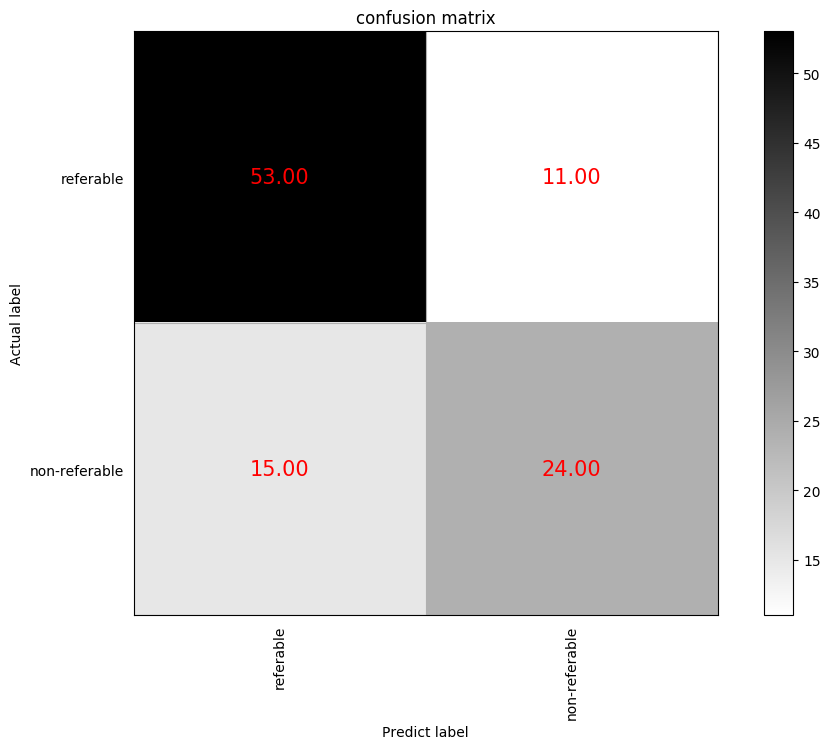

In [0]:

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, savename, title='Confusion Matrix'):
    plt.figure(figsize=(12, 8), dpi=100)
    np.set_printoptions(precision=2)

    # the probabilities in confusion matrix
    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=15, va='center', ha='center')

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')

    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)

    # show confusion matrix
    plt.savefig(savename, format='png')
    plt.show()


classes = ['referable','non-referable']


# 获取混淆矩阵
cm = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')